In [58]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [59]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [60]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [61]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [62]:

#Use the SQLAlchemy automap_base() function to reflect your tables into classes
Base = automap_base()
Base.prepare(autoload_with=engine)
Base.classes.keys()
hawaii = Base.classes

#save references to the classes named station and measurement
station = Base.classes.station
measurement = Base.classes.measurement
session = Session(engine)

# reflect the tables measurement
for row in session.query(hawaii.measurement.date, hawaii.measurement.prcp).all():
  print(str(row))

#refelct the table station
for row in session.query(hawaii.station.name, hawaii.station.elevation).all():
  print(str(row))



('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

In [63]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [64]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [65]:
# Create our session (link) from Python to the DB
session = Session(engine)
conn = engine.connect()

# Exploratory Precipitation Analysis

In [66]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date


('2017-08-23',)

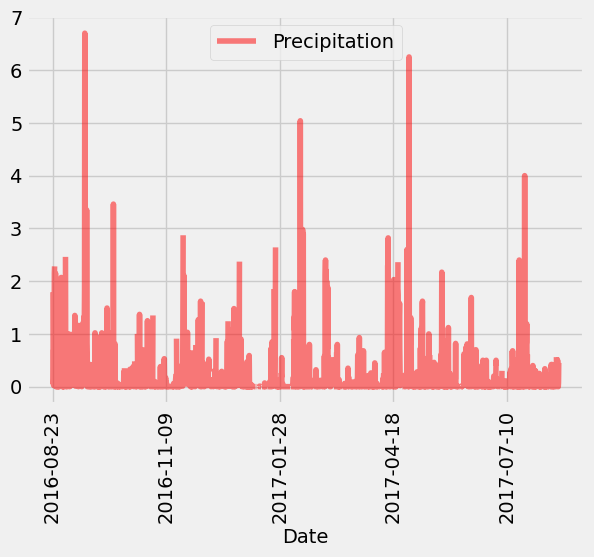

In [67]:

# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database, Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()
# prcp_data

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=["Date","Precipitation"])

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
# prcp_df.set_index("Date",inplace=True)
prcp_df

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x = "Date", y = "Precipitation", color='r', alpha=0.5, rot=90)
plt.show()

In [68]:
# Use Pandas to calculate the summary statistics for the precipitation data
s = pd.Series(prcp_data)
s.describe()

count                  2230
unique                 1550
top       (2017-02-10, 0.0)
freq                      7
dtype: object

# Exploratory Station Analysis

In [69]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(station.station).count()
station_count

9

In [70]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

session.query(measurement.station, func.count(measurement.station)).\
group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [71]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# prcp_data = session.query(measurement.date, measurement.prcp).filter(measurement.date >= year_ago).all()

station_data = session.query(measurement.station, measurement.tobs).filter(measurement.station == 'USC00511918').all()
station_df = pd.DataFrame(station_data, columns=["Station","Tobs"])
new_df = station_df.loc[2:].describe()
new_df

,Tobs
count,1977.000000
mean,71.619626
std,5.477501
min,53.000000
25%,68.000000
50%,72.000000
75%,75.000000
max,87.000000


     tobs
0    77.0
1    77.0
2    80.0
3    80.0
4    75.0
..    ...
347  77.0
348  77.0
349  76.0
350  76.0
351  79.0

[352 rows x 1 columns]


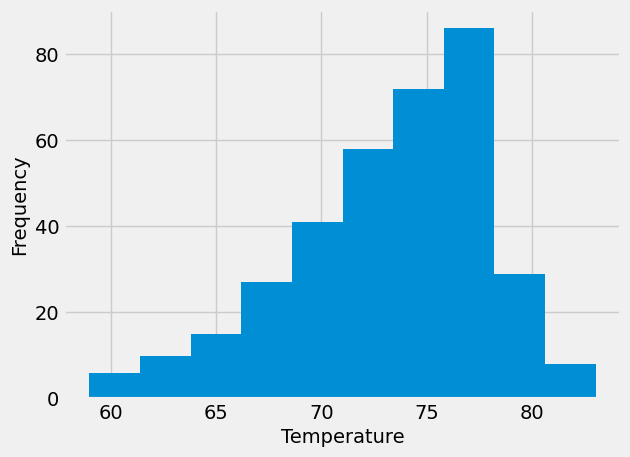

In [72]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_histo_data = session.query(measurement.tobs).\
    filter(measurement.station == 'USC00519281').filter(measurement.date >= year_ago).all()
station_histo_df = pd.DataFrame(station_histo_data,columns=["tobs"])
print(station_histo_df)

plt.hist(station_histo_df)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


# Close Session

In [73]:
# Close Session
session.close()